In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
%matplotlib inline

import os
import cv2
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation 
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [2]:
is_local = True

if(is_local):
    path = '/Users/rahulkotecha/Desktop/untitled folder/xray_dataset_covid19/'
else:
    path = '../input/'

print(os.listdir(path))

['.DS_Store', 'test', 'train']


In [3]:
train_path = os.path.join(path,'train/')
test_path = os.path.join(path,'test/')

print(f'Train Path List of Directory:\n {os.listdir(train_path)}\n')
print(f'Test Path List of Directory:\n {os.listdir(test_path)}')

Train Path List of Directory:
 ['.DS_Store', 'PNEUMONIA', 'NORMAL']

Test Path List of Directory:
 ['.DS_Store', 'PNEUMONIA', 'NORMAL']


In [4]:
pneumonia_sample = os.path.join(train_path,'PNEUMONIA/')
normal_sample = os.path.join(train_path,'NORMAL/')


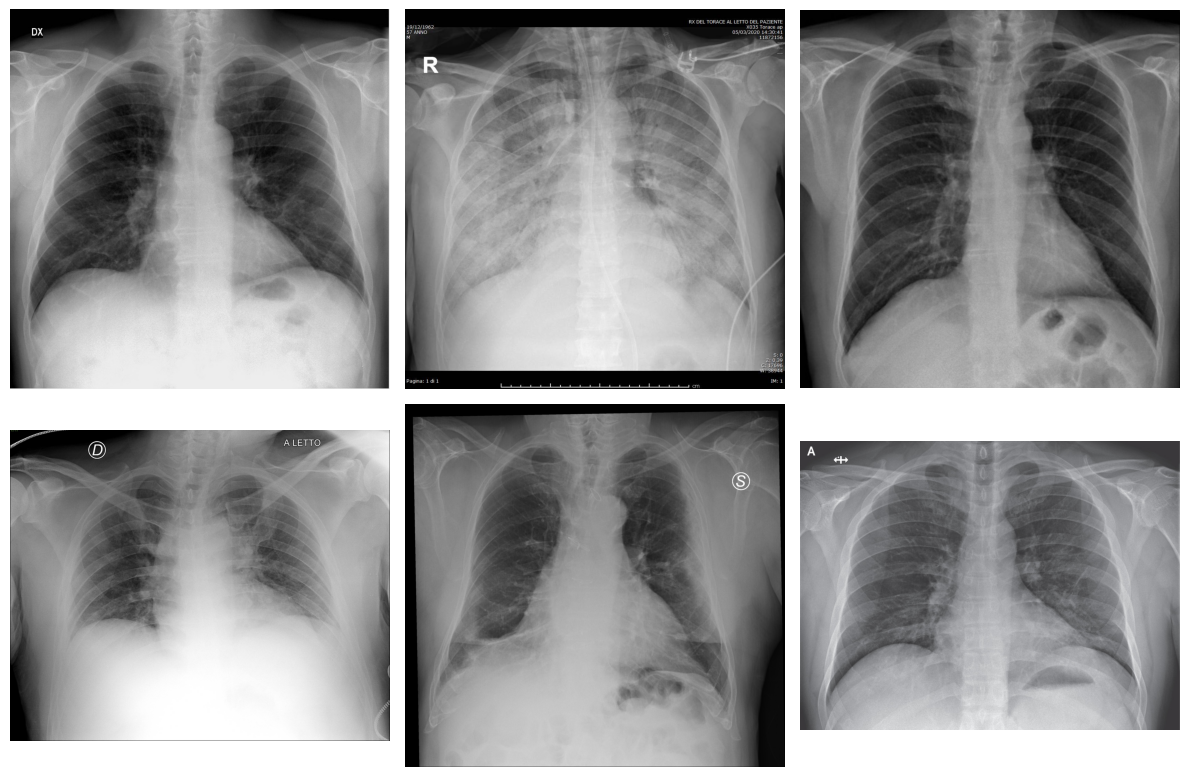

In [5]:
image_files = os.listdir(pneumonia_sample)
image_files = image_files[:6]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, image_file in enumerate(image_files):
    row = i // 3
    col = i % 3
    
    img = mpimg.imread(os.path.join(pneumonia_sample, image_file))
    
    axes[row, col].imshow(img)
    axes[row, col].axis('off')  
    
plt.tight_layout()  
plt.show()

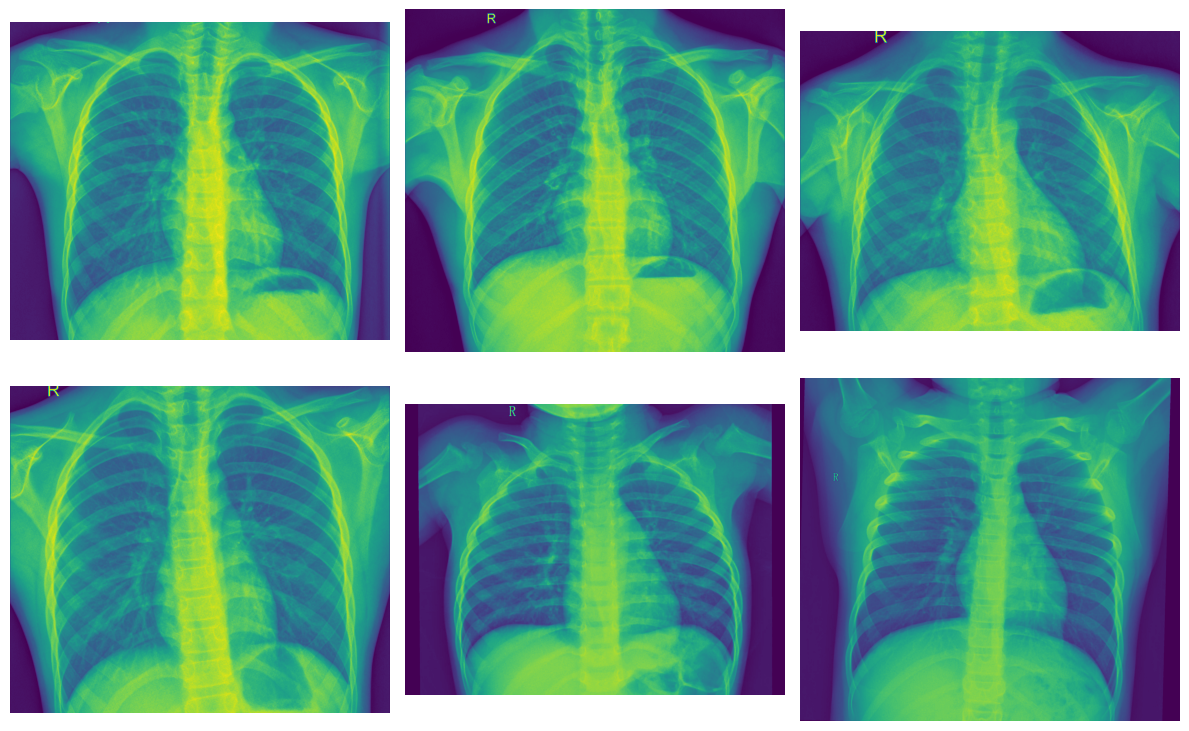

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_files = os.listdir(normal_sample)
image_files = image_files[:6]  # Take first 6 files

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, image_file in enumerate(image_files):
    row = i // 3
    col = i % 3
    
    img = mpimg.imread(os.path.join(normal_sample, image_file))
    
    axes[row, col].imshow(img)
    axes[row, col].axis('off')  
    
plt.tight_layout()  
plt.show()


In [7]:
os.listdir(normal_sample)[ :1]

['IM-0031-0001.jpeg']

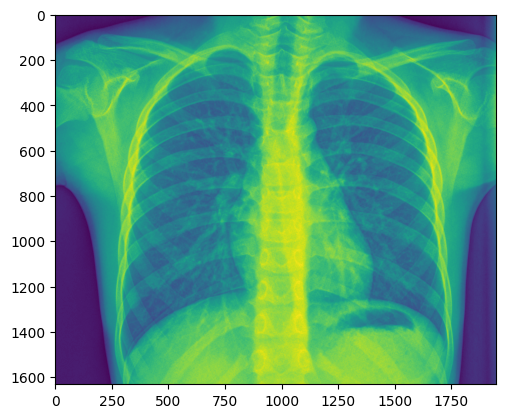

In [8]:
a = os.path.join(normal_sample,'IM-0031-0001.jpeg')
image = mpimg.imread(a)

plt.imshow(image)
plt.show()

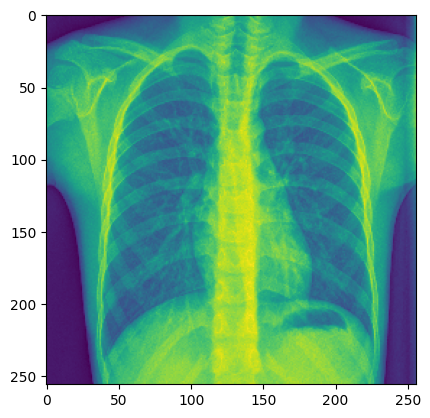

In [9]:
a = os.path.join(normal_sample,'IM-0031-0001.jpeg')
image = mpimg.imread(a)
resized_image = cv2.resize(image, (256,256))
plt.imshow(resized_image)
plt.show()

In [10]:
train_datagen = ImageDataGenerator(
    rescale= 1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (256,256),
    batch_size = 5,
    class_mode = 'binary'
)


test_generator = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = (256,256),
    batch_size = 5,
    class_mode = 'binary'
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [11]:
class_labels = train_generator.class_indices

print("Class Labels:", class_labels)

Class Labels: {'NORMAL': 0, 'PNEUMONIA': 1}


In [12]:
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2), strides =2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2), strides =2),
    Conv2D(256, (3, 3), activation='relu'),
    Flatten(),
    Dropout(0.5),  
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid') 
])

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [14]:
model1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

history1 = model1.fit(train_generator, epochs=25, callbacks = [early_stopping])

Epoch 1/25


2024-02-23 13:07:40.731645: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-02-23 13:07:40.735929: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


30/30 [==============================] - 9s 274ms/step - loss: 0.9162 - accuracy: 0.5473
Epoch 2/25
30/30 [==============================] - 10s 331ms/step - loss: 0.6224 - accuracy: 0.6824
Epoch 3/25
30/30 [==============================] - 10s 325ms/step - loss: 0.6076 - accuracy: 0.7095
Epoch 4/25
30/30 [==============================] - 11s 372ms/step - loss: 0.5028 - accuracy: 0.8041
Epoch 5/25
30/30 [==============================] - 10s 322ms/step - loss: 0.6436 - accuracy: 0.6959
Epoch 6/25
30/30 [==============================] - 12s 408ms/step - loss: 0.6073 - accuracy: 0.6757
Epoch 7/25
30/30 [==============================] - 11s 366ms/step - loss: 0.4792 - accuracy: 0.8041
Epoch 8/25
30/30 [==============================] - 9s 312ms/step - loss: 0.4077 - accuracy: 0.8514
Epoch 9/25
30/30 [==============================] - 8s 270ms/step - loss: 0.3519 - accuracy: 0.8378
Epoch 10/25
30/30 [==============================] - 10s 339ms/step - loss: 0.3363 - accuracy: 0.8378
Epo

In [15]:
evaluation = model1.evaluate_generator(test_generator)

# Print the evaluation results
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

2024-02-23 13:09:51.105243: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Test Loss: 0.11764226108789444
Test Accuracy: 0.9750000238418579


2/8 [======>.......................] - ETA: 0s

2024-02-23 13:14:25.835875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 [==============================] - 1s 60ms/step


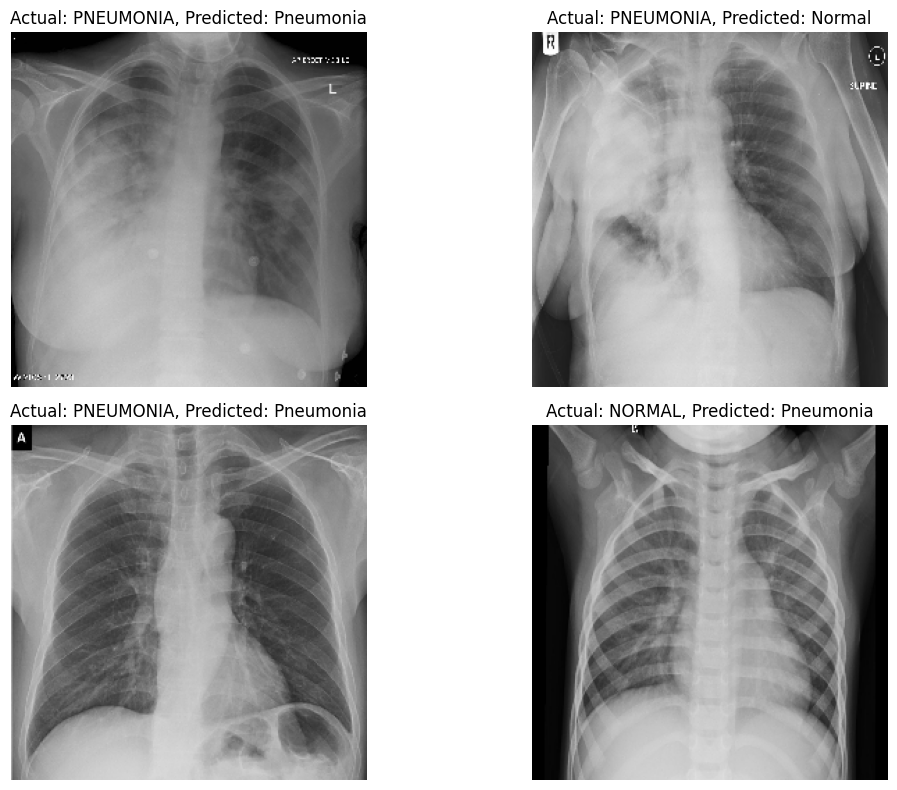

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Get 4 random images from the test set
random_indexes = np.random.choice(len(test_generator), size=4, replace=False)

# Predictions on the random images
predictions = model1.predict(test_generator)

# Classes' labels
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# Plot the images along with their labels
plt.figure(figsize=(12, 8))
for i, index in enumerate(random_indexes, 1):
    plt.subplot(2, 2, i)
    image, label = test_generator[index]
    plt.imshow(image[0])
    plt.axis('off')
    actual_label = class_labels[int(label[0])]
    predicted_label = 'Normal' if predictions[index] < 0.5 else 'Pneumonia'
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
plt.tight_layout()
plt.show()
